In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime ,timedelta

In [60]:
apps_df=pd.read_csv("Play Store Data.csv")

In [61]:
apps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [62]:
apps_df.info()
apps_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [63]:
# Clean Installs
apps_df['Installs'] = apps_df['Installs'].str.replace('+','', regex=False)
apps_df['Installs'] = apps_df['Installs'].str.replace(',','', regex=False)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

# Filter
apps_df_filtered = apps_df[(apps_df['Rating'] >= 4.0)]

# Group
top_categories = (
    apps_df_filtered.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

top_categories

Category
GAME             3.480939e+10
COMMUNICATION    3.256412e+10
SOCIAL           1.393930e+10
Name: Installs, dtype: float64

In [77]:
apps_df['Size'] = apps_df['Size'].astype(str)
apps_df['Size'] = apps_df['Size'].str.replace('M','', regex=False)
apps_df['Size'] = pd.to_numeric(apps_df['Size'], errors='coerce')

In [79]:
apps_df['Price'] = apps_df['Price'].astype(str)
apps_df['Price'] = apps_df['Price'].str.replace('$','', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')

In [80]:
apps_df['Android Ver'] = apps_df['Android Ver'].astype(str)
apps_df['Android Ver'] = apps_df['Android Ver'].str.extract('(\d+\.\d+)')
apps_df['Android Ver'] = pd.to_numeric(apps_df['Android Ver'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Pratham H Shetty\AppData\Local\Temp\ipykernel_18984\1170027703.py:2: SyntaxWarning: invalid escape sequence '\d'
  apps_df['Android Ver'] = apps_df['Android Ver'].str.extract('(\d+\.\d+)')


In [82]:
apps_df['Revenue'] = apps_df['Price'] * apps_df['Installs']

In [83]:
apps_df['App_Len'] = apps_df['App'].astype(str).apply(len)

In [84]:
apps_df_filtered = apps_df[
    (apps_df['Installs'] >= 10000) &
    (apps_df['Revenue'] > 0) &
    (apps_df['Android Ver'] > 4.0) &
    (apps_df['Size'] > 15) &
    (apps_df['Content Rating'] == 'Everyone') &
    (apps_df['App_Len'] <= 30)
]

In [87]:
top3 = (
    apps_df_filtered.groupby('Category')['Installs']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

apps_df_top3 = apps_df_filtered[apps_df_filtered['Category'].isin(top3)]
apps_df_top3['Category'].unique()

array(['FAMILY', 'PHOTOGRAPHY', 'PERSONALIZATION'], dtype=object)

In [88]:
final_df = (
    apps_df_top3.groupby('Type')
    .agg({
        'Installs':'mean',
        'Revenue':'mean'
    })
    .reset_index()
)

final_df

,Type,Installs,Revenue
0,Paid,481875.0,1598618.75


In [89]:
now_ist = datetime.utcnow() + timedelta(hours=5, minutes=30)

if 13 <= now_ist.hour < 19:
    show_chart = True
else:
    show_chart = False

show_chart

C:\Users\Pratham H Shetty\AppData\Local\Temp\ipykernel_18984\2986177016.py:1: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now_ist = datetime.utcnow() + timedelta(hours=5, minutes=30)


True

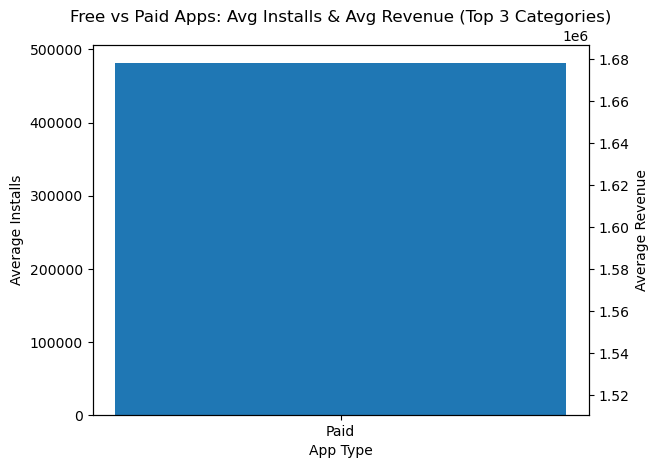

In [90]:
if show_chart:

    fig, ax1 = plt.subplots()

    ax1.bar(final_df['Type'], final_df['Installs'])
    ax1.set_xlabel("App Type")
    ax1.set_ylabel("Average Installs")

    ax2 = ax1.twinx()
    ax2.plot(final_df['Type'], final_df['Revenue'], marker='o')
    ax2.set_ylabel("Average Revenue")

    plt.title("Free vs Paid Apps: Avg Installs & Avg Revenue (Top 3 Categories)")
    plt.show()

else:
    print("Chart visible only between 1 PM IST to 2 PM IST")

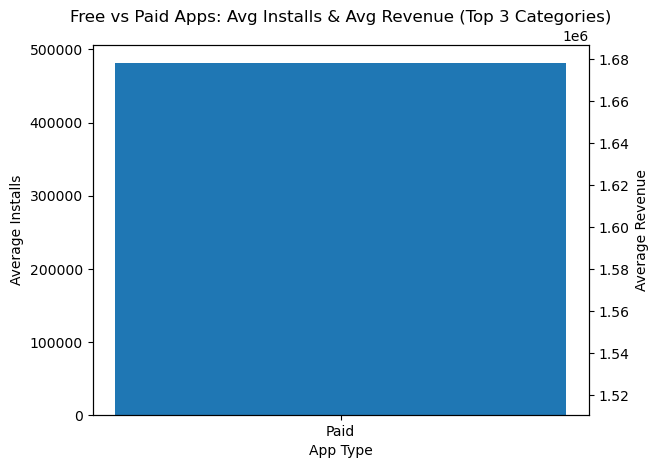

In [91]:
if show_chart:

    fig, ax1 = plt.subplots()

    ax1.bar(final_df['Type'], final_df['Installs'])
    ax1.set_xlabel("App Type")
    ax1.set_ylabel("Average Installs")

    ax2 = ax1.twinx()
    ax2.plot(final_df['Type'], final_df['Revenue'], marker='o')
    ax2.set_ylabel("Average Revenue")

    plt.title("Free vs Paid Apps: Avg Installs & Avg Revenue (Top 3 Categories)")
    plt.show()

else:
    print("Chart visible only between 1 PM IST to 2 PM IST")